In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
from keras.applications import VGG19
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np 

import os

In [2]:
def load_data(folder_name):
    X = []
    y = []
    class_names = os.listdir(folder_name)
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(folder_name, class_name)
        print(class_name.capitalize(),"has",len(os.listdir(class_path)),"images")
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = load_img(image_path, target_size = (224,224))
            image = img_to_array(image)
            X.append(image)
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

train_folder = "input"
X, y = load_data(train_folder)

Daisy has 501 images
Dandelion has 646 images
Rose has 497 images
Sunflower has 495 images
Tulip has 607 images


In [9]:
X = X.astype('float32')/255
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
print("Training data has",len(X_train),"images")
print("Validation data has",len(X_val),"images")

Training data has 2196 images
Validation data has 550 images


In [6]:
#VGG19 architecture

model = Sequential([
    layers.Input(shape = (224, 224, 3)),
    
    layers.Conv2D(64, (3,3), padding = "same", activation = "relu"),
    layers.Conv2D(64, (3,3), padding = "same", activation = "relu"),
    layers.MaxPooling2D((2,2), strides = (2,2)),
                  
    layers.Conv2D(128, (3,3), padding = "same", activation = "relu"),
    layers.Conv2D(128, (3,3), padding = "same", activation = "relu"),
    layers.MaxPooling2D((2,2), strides = (2,2)),
                  
    layers.Conv2D(256, (3,3), padding = "same", activation = "relu"),
    layers.Conv2D(256, (3,3), padding = "same", activation = "relu"),
    layers.Conv2D(256, (3,3), padding = "same", activation = "relu"),
    layers.Conv2D(256, (3,3), padding = "same", activation = "relu"),
    layers.MaxPooling2D((2,2), strides = (2,2)),
                  
    layers.Conv2D(512, (3,3), padding = "same", activation = "relu"),
    layers.Conv2D(512, (3,3), padding = "same", activation = "relu"),
    layers.Conv2D(512, (3,3), padding = "same", activation = "relu"),
    layers.Conv2D(512, (3,3), padding = "same", activation = "relu"),
    layers.MaxPooling2D((2,2), strides = (2,2)),
                  
    layers.Conv2D(512, (3,3), padding = "same", activation = "relu"),
    layers.Conv2D(512, (3,3), padding = "same", activation = "relu"),
    layers.Conv2D(512, (3,3), padding = "same", activation = "relu"),
    layers.Conv2D(512, (3,3), padding = "same", activation = "relu"),
    layers.MaxPooling2D((2,2), strides = (2,2)),
                  
    Flatten(),
    Dense(4096, activation="relu"),
    Dense(4096, activation="relu"),
    Dense(1000, activation="relu"),
    
    Dense(5, activation="softmax")
])

In [ ]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 32, epochs = 10)

In [4]:
#Using pre trained weights (Transfer Learning)

VGG19_base = VGG19(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(VGG19_base)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dense(5, activation = "softmax"))

VGG19_base.trainable = False

In [5]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [7]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 32, epochs = 10)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.4623 - loss: 1.5661 - val_accuracy: 0.7164 - val_loss: 0.7562
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.7899 - loss: 0.5479 - val_accuracy: 0.7709 - val_loss: 0.6714
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - accuracy: 0.8819 - loss: 0.3523 - val_accuracy: 0.7891 - val_loss: 0.6200
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - accuracy: 0.9258 - loss: 0.2494 - val_accuracy: 0.8073 - val_loss: 0.6071
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 241s 4s/step - accuracy: 0.9580 - loss: 0.1670 - val_accuracy: 0.8036 - val_loss: 0.5729
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.9602 - loss: 0.1400 - val_accuracy: 0.8091 - val_loss: 0.5875
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 225s 3s/step - accuracy: 0.9702 - loss: 0.1184 - val_accuracy: 0.8000 - val_loss: 0.6432
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 228s 3s/step - accuracy: 0.9826 - loss: 0.0757 - val_accuracy: 0.8145 - v

Text(0.5, 1.0, 'Training and Validation Loss')

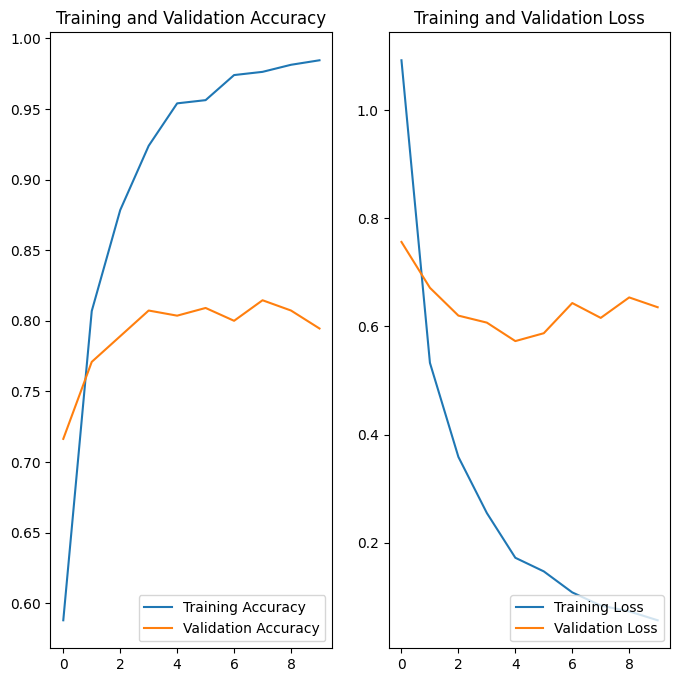

In [8]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs_range = range(10)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = "Training Accuracy")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")
plt.legend(loc = "lower right")
plt.title("Training and Validation Loss")